### Trees

- A tree is either
    - Empty
    - A node with a key, and a list of child nodes

- Tree jargon
    - Root: Node at the top
    - Child: A node that is 1 level downstream from another node
    - Parent: A node that is 1 level upstream from another node
    - Ancestor: All upstream nodes of a node are considered ancestors
    - Descendant: All downstream nodes of a node are considered decendants
    - Sibling: Shares same parent
    - Leaf: Node with no children
    - Interior node: Not a leaf node
    - Level: 1 + edges between root and current node
    - Height: Distance between the node and leaf
    - Forest: Multiple trees

- A node contains
    - key: 
    - children: list of children nodes
    - [optiona] parent 

- A binary tree node contains
    - key
    - left
    - right     
    - [optiona] parent     

- Since everything to the left and right of a node must also be a tree in itself, we have the following recursive definitions for height and size of tree
```
def height(tree):
    if tree is None:
        return 0
    else:
        return 1 + max(height(tree.left), height(tree.right))

def size(tree):
    if tree is None:
        return 0
    else:
        return 1 + size(tree.left) + size(tree.right)
```

### Tree traversal

- There are the following ways of traversing a tree, which we will implement below
    - Depth-first
        - InOrderTraversal
        - PreOrderTraversal
        - PostOrderTraversal
    - Breadth-first
        - LevelTraversal

- For illustration, assume the following tree. 
    ```
    Les
        Cathy
            Alex
            Frank
        Sam
            Nancy
            Violet
                Tony 
                Wendy
    ```
    - The traversal orders are
        - **InOrderTraversal:** Alex Cathy Frank Les Nancy Sam Tony Violet Wendy
        - **PreOrderTraversal:** Les Cathy Alex Frank Sam Nancy Violet Tony Wendy
        - **PostOrderTraversal:** Alex Frank Cathy Nancy Tony Wendy Violet Sam Les
        - **LevelTraversal:** Les Cathy Sam Alex Frank Nancy Violet Tony Wendy

- The difference in the traversal orders above are entirely dependent on how the print order for the tree is recursively resolved. Implementations below:

In [1]:
from typing import Type

class TreeNode:
    def __init__(self, key):
        self.key: str = key
        self.left: Type['TreeNode'] = None
        self.right: Type['TreeNode'] = None

les = TreeNode('Les')
cathy = TreeNode('Cathy')
alex = TreeNode('Alex')
frank = TreeNode('Frank')
sam = TreeNode('Sam')
nancy = TreeNode('Nancy')
violet = TreeNode('Violet')
tony = TreeNode('Tony')
wendy = TreeNode('Wendy')

les.left = cathy
les.right = sam
cathy.left = alex
cathy.right = frank
sam.left = nancy
sam.right = violet
violet.left = tony
violet.right = wendy

```
Les
    Cathy
        Alex
        Frank
    Sam
        Nancy
        Violet
            Tony 
            Wendy
```

In [11]:
def pre_order_traversal(root):
    if root:
        print(root.key)
        pre_order_traversal(root.left)
        pre_order_traversal(root.right)

def in_order_traversal(root):
    if root:
        in_order_traversal(root.left)
        print(root.key)
        in_order_traversal(root.right)

def post_order_traversal(root):
    if root:
        post_order_traversal(root.left)
        post_order_traversal(root.right)
        print(root.key)

def level_order_traversal(root, is_root=False):
    if root:    
        if is_root:
            print(root.key)
        
        if root.left:
            print(root.left.key)
        if root.right:
            print(root.right.key)
        level_order_traversal(root.left)
        level_order_traversal(root.right)

# level_order_traversal(les, is_root=True)

### Just for fun

- We explore 2 more traversal methods just for fun

#### Boundary traversal

- Boundary traversal, where we want to traverse the boundary of a given tree

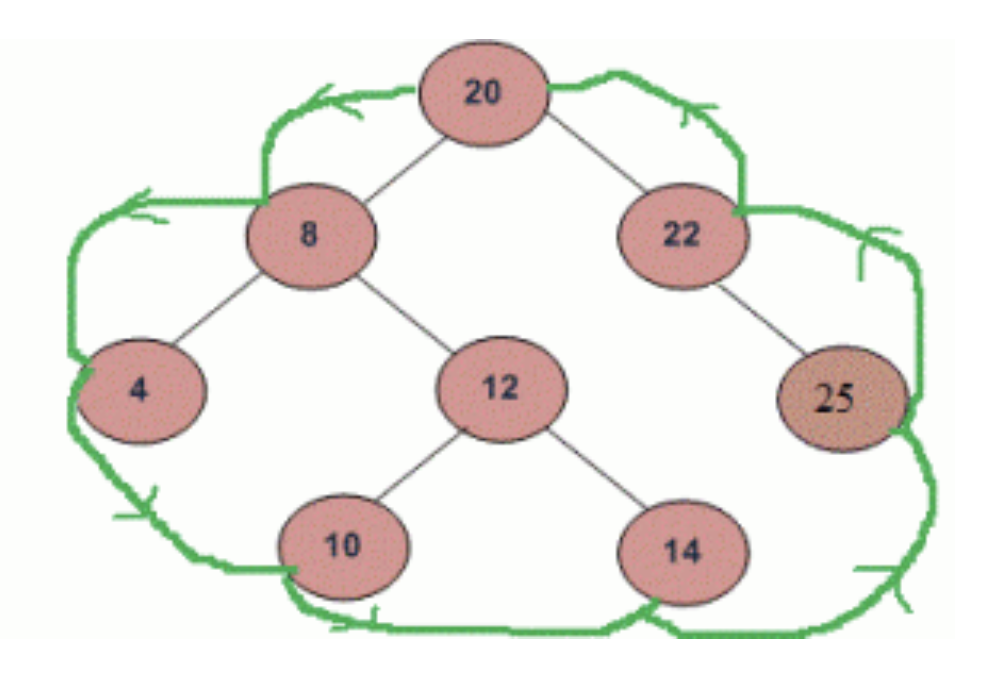

In [39]:
from typing import Type

class TreeNode:
    def __init__(self, data):
        self.data: str = data
        self.left: Type['TreeNode'] = None
        self.right: Type['TreeNode'] = None

a,b,c,d,e,f,g,h = [TreeNode(x) for x in ['20', '8', '22', '4', '12', '25', '10', '14']]
a.left, a.right, b.left, b.right, c.right, e.left, e.right = b, c, d, e, f, g, h
# extra1 = TreeNode('22left')
# extra2 = TreeNode('25left')
# extra3 = TreeNode('25right')
# c.left = extra1
# f.left = extra2
# f.right = extra3

In [38]:
def is_leaf(node):
    if (node.left is None) and (node.right is None):
        return True
    return False

def print_left_edge(root):
    ## Left edge
    while not is_leaf(root):
        print(root.data)
        root = root.left

def print_leaves(root):
    if not is_leaf(root):
        if root.left:
            print_leaves(root.left)
        if root.right:
            print_leaves(root.right)
    else:
        print(root.data)

def print_right_edge(root):
    stack = []
    curr_node = root.right
    while not is_leaf(curr_node):
        stack.append(curr_node)
        curr_node = curr_node.right

    while stack:
        print(stack.pop().data)

def traverse_boundary(root):
    '''
    There are 3 groups of nodes to print, in the following order
        - Left edge (i.e. all nodes on the left edge that are not leafs)
            - Traverse down the left path until you reach a leaf. Print everything unless it is a leaf.
        - Leaf nodes (all leaves must be part of the boundary)
            - Traverse down every path until you hit a leaf, and print the leaf.
        - Right edge (i.e. all nodes on the right edge that are not leafs)
            - Traverse down the right path, storing all intermediate nodes in a stack, until you hit a leaf. Then pop from stack
    '''
    print_left_edge(root)
    print_leaves(root)
    print_right_edge(root)
        
traverse_boundary(a)

20
8
4
10
14
22left
25left
25right
25
22


#### Diagonal traversal

- Diagonal traversal, where we traverse the tree in a diagonal manner
    - For below: 8 10 14 3 6 7 13 1 4


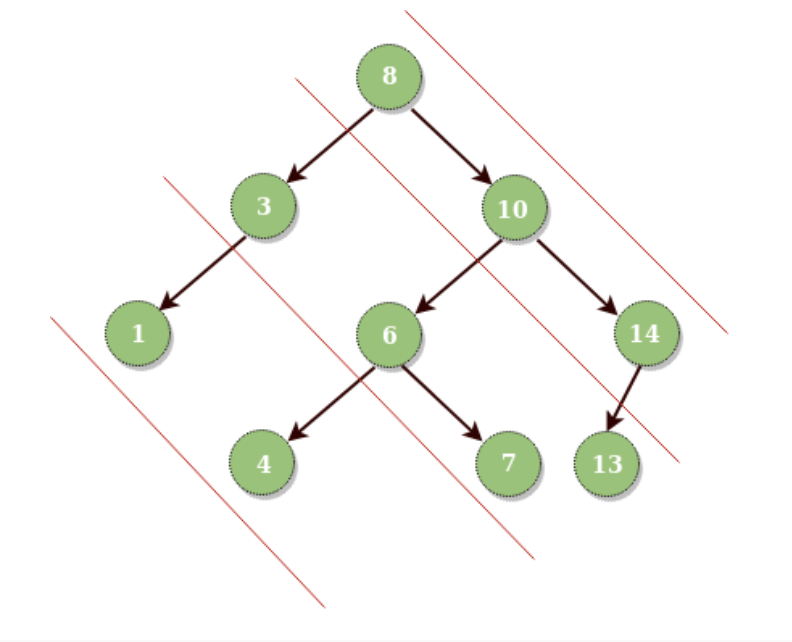

In [58]:
from typing import Type
from dataclasses import dataclass

@dataclass
class Node:
    data: str 
    left: Type['TreeNode'] = None
    right: Type['TreeNode'] = None

    def __repr__(self):
        left = self.left.data if self.left else None
        right = self.right.data if self.right else None
        return f'Node({self.data=}, {left=}, {right=})'
    
root = Node(8)

root.left = Node(3)
root.right = Node(10)

root.left.left = Node(1)

root.right.left = Node(6)
root.right.right = Node(14)

root.right.left.left = Node(4)
root.right.left.right = Node(7)

root.right.right.left = Node(13)

def traverse_diagonal(root):
    '''
    Time complexity: O(N) because we are iterating through all nodes and printing
    Space complexity: O(N) because we use a queue to store
    '''
    queue = [root]
    while queue:
        # print('='*50)
        # print(queue)
        curr_node = queue.pop(0)
        print(curr_node.data)
        if curr_node.right:
            queue.insert(0, curr_node.right)
        if curr_node.left:
            queue.append(curr_node.left)
        # print(queue)

traverse_diagonal(root)

8
10
14
3
6
7
13
1
4
